In [149]:
import squidpy as sq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import numpy as np

In [150]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(5, 5))

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.1.1
PyQt5                       NA
anyio                       NA
appdirs                     1.4.4
asciitree                   NA
attr                        21.2.0
babel                       2.9.1
backcall                    0.2.0
build                       0.8.0
cachey                      0.2.1
certifi                     2022.06.15
cffi                        1.15.0
charset_normalizer          2.0.7
cloudpickle                 2.1.0
cycler                      0.10.0
cython_runtime              NA
dask                        2022.6.1
dask_image                  2021.12.0
dateutil                    2.8.2
debugpy                     1.5.0
decorator                   5.1.1
defusedxml                  0.7.1
docrep                      0.3.2
docstring_parser            NA
entrypoints                 0.3
fasteners                   0.17.3
fastjsonschema              NA
fontTools                   4.33.3
fss

In [154]:
adata_file = f"t1l_day7_slideseq_cell2location.h5ad"
adata_vis = sc.read_h5ad(adata_file)

In [87]:
print(adata_vis.obsm)
adata_vis.obsm['q05_cell_proportions'] = adata_vis.obsm['q05_cell_abundance_w_sf'].div(adata_vis.obsm['q05_cell_abundance_w_sf'].sum(axis=1), axis=0)

AxisArrays with keys: means_cell_abundance_w_sf, q05_cell_abundance_w_sf, q95_cell_abundance_w_sf, spatial, stds_cell_abundance_w_sf


In [88]:
# add 5% quantile, representing confident cell abundance, 'at least this amount is present',
# to adata.obs with nice names for plotting
adata_vis.obs["total_abundance"] = adata_vis.obsm['q05_cell_abundance_w_sf'].sum(axis = 1)
# adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_proportions']
ct_list = list(adata_vis.uns['mod']['factor_names'])
adata_vis.obs["max_pred"] = adata_vis.obs[adata_vis.uns['mod']['factor_names']].max(axis=1)
adata_vis.obs["max_pred_celltype"] = adata_vis.obs[adata_vis.uns['mod']['factor_names']].idxmax(axis=1)
adata_vis.obs["max_pred_celltype"] = adata_vis.obs["max_pred_celltype"].astype("category")

In [89]:
adata_vis.obs["max_pred_celltype"].value_counts()

Cardiomyocytes                             34058
T cells                                     1444
Dendritic cells                             1086
Erythroblasts                                844
Ccl2+ fibroblasts                            670
NK cells                                     418
Macrophages                                  408
Cxcl9-high inflamed\n endothelial cells      368
Neutrophils                                  366
Fibroblasts                                  253
Endocardial cells                            132
Smooth muscle cells                          100
Mesenchymal endothelial cells                 89
Pericardial cells                             56
B cells                                       45
Schwann cells                                 25
Inflamed endothelial cells                    24
Pericytes                                      8
Endothelial cells                              6
Name: max_pred_celltype, dtype: int64

In [90]:
sq.gr.spatial_neighbors(adata_vis, coord_type="generic")

Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)


In [93]:
adata_vis.obs["celltypes_leiden_1.0"] = sc.read_h5ad("./../t1l_day7_slideseq_mm_with_image_filtered_processed.h5ad").obs["celltypes_leiden_1.0"]

In [155]:
adata_vis = sc.read_h5ad("./../t1l_day7_slideseq_mm_with_image_filtered_processed.h5ad")

In [156]:
sq.gr.spatial_neighbors(adata_vis, coord_type="generic")

Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)


In [157]:
sq.gr.nhood_enrichment(adata_vis, cluster_key="celltypes_leiden_1.0", n_jobs = 20)

Calculating neighborhood enrichment using `20` core(s)


  0%|          | 0/1000 [00:00<?, ?/s]

Adding `adata.uns['celltypes_leiden_1.0_nhood_enrichment']`
Finish (0:03:13)


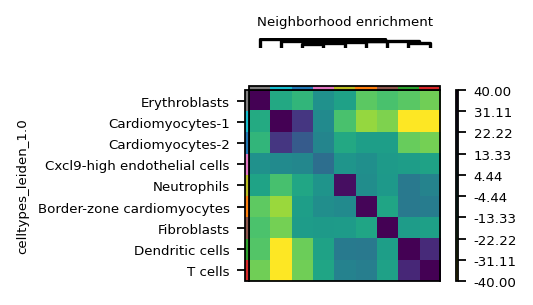

In [159]:
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, vector_friendly=False, figsize=(2.2, 2.22), fontsize=6)
sq.pl.nhood_enrichment(adata_vis, cluster_key="celltypes_leiden_1.0", method="single", vmin = -40, vmax = 40, cmap="viridis_r", 
    palette=['#17becf', 
 '#1f77b4',
 '#ff7f0e',
 '#d62728',
 '#2ca02c',
 '#8c564b',
 '#e377c2',
 '#bcbd22',
 '#7f7f7f'], figsize=(1.7,1.6), save="slideseq_heatmap_1.pdf")

In [163]:
adata_vis.uns["celltypes_leiden_1.0_nhood_enrichment"]

{'zscore': array([[ 7.09923508e+01,  2.73685861e+01, -2.73216884e+01,
         -5.05610272e+01, -4.45324977e+01, -2.44768831e+01,
          1.80923791e+00, -1.71574658e+01, -8.83724897e+00],
        [ 2.74491864e+01,  1.69225456e+01, -4.72351294e+00,
         -2.32761642e+01, -2.14981887e+01, -4.86455291e+00,
          3.65696210e+00, -8.12712111e+00, -1.27890388e+01],
        [-2.79284149e+01, -4.71688494e+00,  3.88411292e+01,
          6.41743025e+00,  7.51193312e+00, -7.07600838e+00,
          5.97585297e-01,  1.64512064e+00, -2.02104597e+01],
        [-4.95998860e+01, -2.25713256e+01,  5.69307288e+00,
          7.14768190e+01,  3.12421668e+01, -5.68494816e+00,
         -6.89886412e+00,  4.42720101e+00, -2.27016288e+01],
        [-4.27367188e+01, -2.19160341e+01,  7.68312663e+00,
          3.05706662e+01,  5.87406355e+01, -4.93184274e+00,
         -5.99000096e+00,  7.24962420e+00, -1.87115451e+01],
        [-2.31358187e+01, -4.19271593e+00, -6.88851051e+00,
         -5.39469082e+00,